# Imports

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

# Extraction

In [4]:
# https://in.finance.yahoo.com/quote/TATAMOTORS.NS/history?p=TATAMOTORS.NS
df = pd.read_csv('./datasets/tatamotors.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-28,448.000000,448.000000,433.000000,440.399994,440.221710,10190394.0
1,2016-06-29,447.100006,449.799988,445.399994,447.250000,447.068939,6285461.0
2,2016-06-30,454.299988,462.250000,451.549988,459.250000,459.064087,13214064.0
3,2016-07-01,463.600006,464.750000,454.700012,457.899994,457.714630,7027759.0
4,2016-07-04,467.000000,474.850006,467.000000,469.500000,469.309937,8413087.0


# Hipotesis

Se tiene la hipotesis de que a menor precio de la acción hay más movimientos.

# Analisis y Transformación

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1231 non-null   float64
 2   High       1231 non-null   float64
 3   Low        1231 non-null   float64
 4   Close      1231 non-null   float64
 5   Adj Close  1231 non-null   float64
 6   Volume     1231 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [6]:
df.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [7]:
# since the amount of missing values is less than 1% we can drop them without any problem
df.dropna(inplace=True)
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1231 non-null   object 
 1   Open       1231 non-null   float64
 2   High       1231 non-null   float64
 3   Low        1231 non-null   float64
 4   Close      1231 non-null   float64
 5   Adj Close  1231 non-null   float64
 6   Volume     1231 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.9+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2016-06-28,448.000000,448.000000,433.000000,440.399994,440.221710,10190394.0,2016,6,28
1,2016-06-29,447.100006,449.799988,445.399994,447.250000,447.068939,6285461.0,2016,6,29
2,2016-06-30,454.299988,462.250000,451.549988,459.250000,459.064087,13214064.0,2016,6,30
3,2016-07-01,463.600006,464.750000,454.700012,457.899994,457.714630,7027759.0,2016,7,1
4,2016-07-04,467.000000,474.850006,467.000000,469.500000,469.309937,8413087.0,2016,7,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 1232
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1231 non-null   datetime64[ns]
 1   Open       1231 non-null   float64       
 2   High       1231 non-null   float64       
 3   Low        1231 non-null   float64       
 4   Close      1231 non-null   float64       
 5   Adj Close  1231 non-null   float64       
 6   Volume     1231 non-null   float64       
 7   Year       1231 non-null   int64         
 8   Month      1231 non-null   int64         
 9   Day        1231 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 105.8 KB


In [12]:
df.rename(columns={'Adj Close':'Price'}, inplace=True)
df.head()

,Date,Open,High,Low,Close,Price,Volume,Year,Month,Day
0,2016-06-28,448.000000,448.000000,433.000000,440.399994,440.221710,10190394.0,2016,6,28
1,2016-06-29,447.100006,449.799988,445.399994,447.250000,447.068939,6285461.0,2016,6,29
2,2016-06-30,454.299988,462.250000,451.549988,459.250000,459.064087,13214064.0,2016,6,30
3,2016-07-01,463.600006,464.750000,454.700012,457.899994,457.714630,7027759.0,2016,7,1
4,2016-07-04,467.000000,474.850006,467.000000,469.500000,469.309937,8413087.0,2016,7,4


In [13]:
# find duplicateds
len(df[df.duplicated()])

0

In [14]:
df.to_csv('./datasets/tatamotors_shares.csv', index=False)


In [15]:
# selecting data to work
data = df.loc[df['Year']==2021, ['Volume','Price']]
data.shape

(119, 2)

In [16]:
data.head()

,Volume,Price
1114,27334421.0,186.500000
1115,63980597.0,191.300003
1116,75752593.0,193.199997
1117,75621947.0,195.399994
1118,66024848.0,196.750000


In [17]:
# scatter plot
fig = px.scatter(data, x='Volume', y='Price', title='TATA Motors share price')
fig.show()

In [18]:
# find outliers
fig = px.box(data, x='Volume', title='tatamotos volume data distribution')
fig.show()

In [19]:
data.sort_values(by='Volume', ascending=False).head(15)

,Volume,Price
1121,390577839.0,237.800003
1129,316008609.0,289.350006
1128,283614463.0,290.600006
1135,251965965.0,322.000000
1124,250038029.0,260.299988
1136,224190114.0,331.000000
1127,205145151.0,274.899994
1120,182483100.0,220.649994
1125,173383224.0,245.949997
1134,165655500.0,279.600006


In [20]:
data.Volume.describe()

count    1.190000e+02
mean     7.920789e+07
std      6.220062e+07
min      1.558022e+07
25%      4.081875e+07
50%      6.024048e+07
75%      8.936043e+07
max      3.905778e+08
Name: Volume, dtype: float64

In [21]:
# adding Quantile_rank column to the DataFrame
data['Quantile_rank'] = pd.qcut(data.Volume, 14, labels = False)
data['Quantile_rank']

1114    0
1115    7
1116    9
1117    9
1118    8
       ..
1228    1
1229    0
1230    0
1231    0
1232    0
Name: Quantile_rank, Length: 119, dtype: int64

In [22]:
data[data.Quantile_rank==13].sort_values(by='Volume', ascending =False)

,Volume,Price,Quantile_rank
1121,390577839.0,237.800003,13
1129,316008609.0,289.350006,13
1128,283614463.0,290.600006,13
1135,251965965.0,322.000000,13
1124,250038029.0,260.299988,13
1136,224190114.0,331.000000,13
1127,205145151.0,274.899994,13
1120,182483100.0,220.649994,13
1125,173383224.0,245.949997,13


In [23]:
data.drop(data[data.Quantile_rank==13].index, inplace=True)

In [24]:
data.shape

(110, 3)

In [25]:
# scatter plot
fig = px.scatter(data, x='Volume', y='Price', title='TATA Motors share price')
fig.show()

In [26]:
# find outliers
fig = px.box(data, x='Price', title='tatamotos volume data distribution')
fig.show()

In [27]:
# adding Quantile_rank column to the DataFrame
data['Quantile_rank'] = pd.qcut(data.Price, 10, labels = False)
data['Quantile_rank']

1114    0
1115    0
1116    0
1117    0
1118    0
       ..
1228    8
1229    8
1230    8
1231    8
1232    8
Name: Quantile_rank, Length: 110, dtype: int64

In [28]:
data[data.Quantile_rank==0].sort_values(by='Price')

,Volume,Price,Quantile_rank
1114,27334421.0,186.500000,0
1115,63980597.0,191.300003,0
1116,75752593.0,193.199997,0
1117,75621947.0,195.399994,0
1118,66024848.0,196.750000,0
1119,53991568.0,198.149994,0
1122,164649387.0,242.600006,0
1123,86819519.0,245.100006,0
1126,136861059.0,258.649994,0
1133,138442348.0,262.700012,0


In [29]:
data.drop(data[data.Quantile_rank==0].index, inplace=True)

In [30]:
data.shape

(99, 3)

In [31]:
# scatter plot
fig = px.scatter(data, x='Volume', y='Price', title='TATA Motors share price vs V')
fig.show()

In [32]:
from scipy.stats import pearsonr
# Correlación líneal entre las variables
corr_test = pearsonr(x = data.Volume, y= data.Price)
print(f'Coeficiente de correlación de Pearson: {corr_test[0]}')
print(f'P-value: {corr_test[1]}')

Coeficiente de correlación de Pearson: -0.24417869055502808
P-value: 0.014863781162320847


### El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.24) y significativa (p-value = 0.0149). 
### Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el Volumen de movimientos en función del Precio de las acciones.

# Módelo de Regresión Líneal con Scikit-learn

In [33]:
# modelo básado en el página 
# https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
# Regresión lineal con Python
from sklearn import linear_model
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [34]:
X = data.Volume.values.reshape(-1, 1)
y = data.Price
modelo = LinearRegression()
modelo.fit(X,y)
modelo.coef_
m = modelo.coef_[0]
b = modelo.intercept_
y_p = m * X + b # valor que se predice
print(f'y={m} *X+ {b}')
print(modelo.predict(X)[0:5])

y=-1.4294634409889998e-07 *X+ 325.9941194782001
[302.5013291  307.89899449 302.31427137 308.69289433 311.19742392]


In [35]:
x_range = np.linspace(X.min(), X.max(), 100)
y_range = modelo.predict(x_range.reshape(-1, 1))

# fig = px.scatter(data, x='Volume', y='Price', opacity=0.65, trendline='ols', trendline_color_override='red', title='TATA Motors share price')
fig = px.scatter(data, x='Volume', y='Price', opacity=0.65, title='TATA Motors Volume vs share price linear regresion')
fig.add_traces(go.Scatter(x=x_range, y=y_range, fillcolor='red'))
fig.show()

# Ajuste al modelo

## Imports

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [37]:
# Ajustamos el modelo empleando como variable de respuesta Volume y como predictor Price
# División de los datos en train y test
X = data.Volume
y = data.Price

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
modelo = LinearRegression()
# Entranamos el modelo
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [38]:
# Información del modelo
print('Intercept:', modelo.intercept_)
print('Coeficiente:', list(zip(X.name, modelo.coef_.flatten(), )))
print('Coeficiente de determinación R^2:', modelo.score(X.values.reshape(-1,1), y))


Intercept: [327.57247492]
Coeficiente: [('V', -1.478820099824125e-07)]
Coeficiente de determinación R^2: 0.0546897043517125


In [39]:
# Evaluación de la capacidad predictiva empleando el conjunto de test (Error de test).
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
    y_true  = y_test,
    y_pred  = predicciones,
    squared = False
)

print(f'El error (rmse) de test es: {rmse}')


[[320.87974434]
 [318.66399121]
 [321.42186647]]
El error (rmse) de test es: 20.410214415658004


# Creación del modelo con Statsmodels

## Imports

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     5.712
Date:                Tue, 06 Jul 2021   Prob (F-statistic):             0.0193
Time:                        08:06:31   Log-Likelihood:                -335.95
No. Observations:                  79   AIC:                             675.9
Df Residuals:                      77   BIC:                             680.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        327.5725      4.370     74.958      0.0

## Intervalos de confianza de los coeficientes

In [42]:
# Intervalos de confianza para los coeficientes del modelo
modelo.conf_int(alpha=0.05)

array([[ 3.18870591e+02,  3.36274359e+02],
       [-2.71093462e-07, -2.46705581e-08]])

## Representación gráfica del módelo

In [43]:
# Predicciones con intervalos de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha =0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x,y
21,325.268440,3.531957,318.235416,332.301464,290.255167,360.281713,15580223.0,334.649994
60,324.256021,3.186297,317.911293,330.600748,289.374487,359.137555,22426352.0,339.649994
55,323.765751,3.026039,317.740137,329.791365,288.940848,358.590654,25741628.0,335.250000
5,323.679662,2.998463,317.708959,329.650365,288.864218,358.495106,26323777.0,323.000000


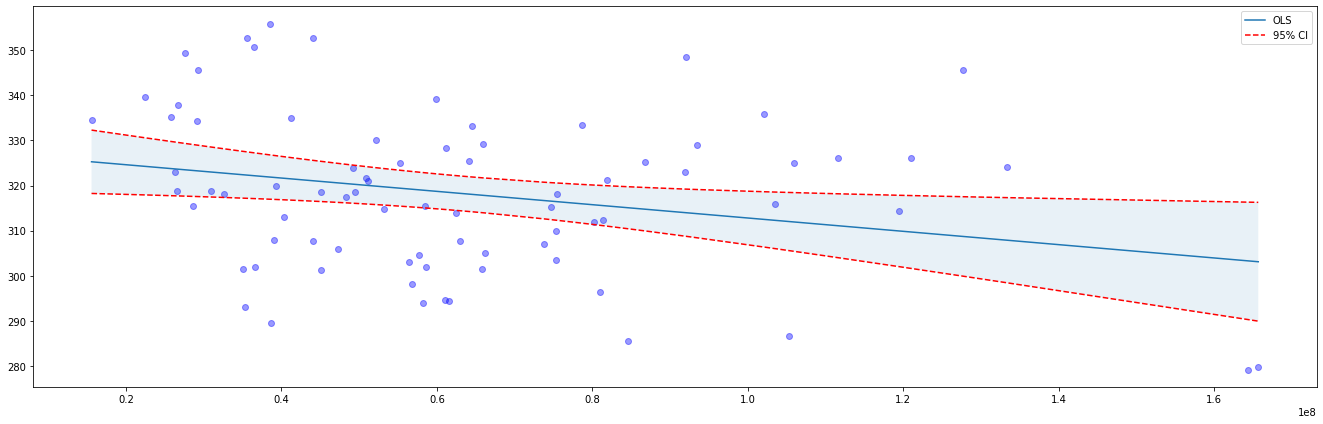

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(23, 7))
ax.scatter(predicciones['x'], predicciones['y'], marker='o', alpha=0.4, color = "blue")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

### Error de test

In [45]:
# Error de test del modelo 
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 20.41021441565803


## Interpretación
La columna (coef) devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal ( β^0  y  β^1 )
que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. 
Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. 
Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. 
Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values < 0.05).

El valor de R-squared indica que el modelo es capaz de explicar el 6% de la variabilidad observada en la variable respuesta (Volume). 
Además, el P-value obtenido en el test F (Prob (F-statistic) = 5.712) indica que sí hay evidencias de que la varianza explicada por el modelo 
es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:
Valume de movimientos = 327.5725 + 0.6305 precio
Por cada unidad que se incrementa el Precio, aumenta el Volumen en promedio 0.6305 unidades.
El error de test del modelo es de 20.41 Las predicciones del modelo final se alejan en promedio 20.41 unidades del valor real.